# РК1 Шамаилов Максим, ИУ5-63Б

### Вариант: 23; Задача: 3; Датасет: 7

#### Импорт библиотек:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

In [2]:
data = pd.read_csv('restaurant-scores-lives-standard.csv')

In [3]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.dtypes

business_id                    int64
business_name                 object
business_address              object
business_city                 object
business_state                object
business_postal_code          object
business_latitude            float64
business_longitude           float64
business_location             object
business_phone_number        float64
inspection_id                 object
inspection_date               object
inspection_score             float64
inspection_type               object
violation_id                  object
violation_description         object
risk_category                 object
Neighborhoods (old)          float64
Police Districts             float64
Supervisor Districts         float64
Fire Prevention Districts    float64
Zip Codes                    float64
Analysis Neighborhoods       float64
dtype: object

In [5]:
data.isnull().sum()
# проверим есть ли пропущенные значения

business_id                      0
business_name                    0
business_address                 0
business_city                    0
business_state                   0
business_postal_code          1018
business_latitude            19556
business_longitude           19556
business_location            19556
business_phone_number        36938
inspection_id                    0
inspection_date                  0
inspection_score             13610
inspection_type                  0
violation_id                 12870
violation_description        12870
risk_category                12870
Neighborhoods (old)          19594
Police Districts             19594
Supervisor Districts         19594
Fire Prevention Districts    19646
Zip Codes                    19576
Analysis Neighborhoods       19594
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   business_id                53973 non-null  int64  
 1   business_name              53973 non-null  object 
 2   business_address           53973 non-null  object 
 3   business_city              53973 non-null  object 
 4   business_state             53973 non-null  object 
 5   business_postal_code       52955 non-null  object 
 6   business_latitude          34417 non-null  float64
 7   business_longitude         34417 non-null  float64
 8   business_location          34417 non-null  object 
 9   business_phone_number      17035 non-null  float64
 10  inspection_id              53973 non-null  object 
 11  inspection_date            53973 non-null  object 
 12  inspection_score           40363 non-null  float64
 13  inspection_type            53973 non-null  obj

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [8]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['inspection_score']])

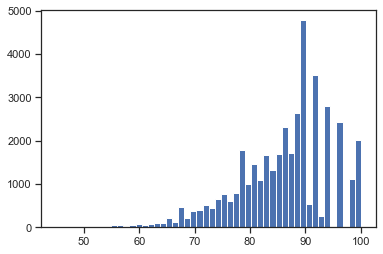

In [9]:
plt.hist(data['inspection_score'], 50)
plt.show()

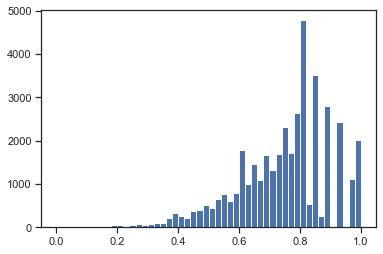

In [10]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler¶

In [11]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['inspection_score']])

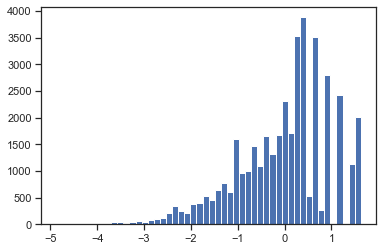

In [12]:
plt.hist(sc2_data, 50)
plt.show()

In [13]:
cat_temp_data = data[['business_name']]
cat_temp_data.head()

,business_name
0,Cochinita #2
1,BREADBELLY
2,Great Gold Restaurant
3,HOMAGE
4,Pronto Pizza


In [14]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Cochinita #2'],
       ['BREADBELLY'],
       ['Great Gold Restaurant'],
       ...,
       ['Philz Coffee'],
       ['El Gran Taco Loco'],
       ['Blue Bottle Coffee']], dtype=object)

In [15]:
cat_enc = pd.DataFrame({'business_name':data_imp2.T[0]})
cat_enc

,business_name
0,Cochinita #2
1,BREADBELLY
2,Great Gold Restaurant
3,HOMAGE
4,Pronto Pizza
...,...
53968,Blue Bottle Coffee
53969,POKE KANA
53970,Philz Coffee
53971,El Gran Taco Loco


In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Кодирование категорий целочисленными значениями - label encoding

In [17]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['business_name'])

In [18]:
cat_enc['business_name'].unique()

array(['Cochinita #2', 'BREADBELLY', 'Great Gold Restaurant', ...,
       'LITTLE PARIS', 'Tosca Cafe', 'LITTLE SWEET'], dtype=object)

In [19]:
np.unique(cat_enc_le)

array([   0,    1,    2, ..., 5569, 5570, 5571])

In [20]:
le.inverse_transform([0, 1, 2, 3])

array(['#1 VERJUS CAVE, #2 VERJUS', '111 Minna Gallery',
       '12 Tribes Kosher Foods', '1428 Haight'], dtype=object)

### Кодирование категорий наборами бинарных значений - one-hot encoding

In [21]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['business_name']])

In [22]:
cat_enc.shape

(53973, 1)

In [23]:
cat_enc_ohe.shape

(53973, 5572)

In [24]:
cat_enc_ohe

<53973x5572 sparse matrix of type '<class 'numpy.float64'>'
	with 53973 stored elements in Compressed Sparse Row format>

In [25]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
cat_enc.head(10)

,business_name
0,Cochinita #2
1,BREADBELLY
2,Great Gold Restaurant
3,HOMAGE
4,Pronto Pizza
5,Brickhouse
6,LAI HONG RESTAURANT
7,Fools Errand
8,MoBowL
9,CurveBall


#### Реализовываем "ящик с усами"

<AxesSubplot:xlabel='inspection_score'>

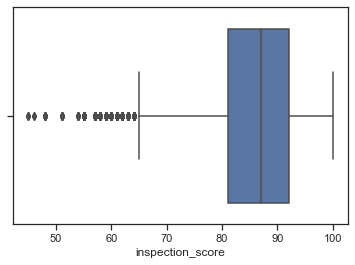

In [27]:
sns.boxplot(data['inspection_score'])